In [32]:
from matplotlib import pyplot as plt
from PIL import Image

In [33]:
src_base_w = 32
src_base_h = 32
iso_base_w = 64
iso_base_h = 32

In [34]:
im_v = Image.open('landh-tiles/landh_tiles.png')
rgb_im_v = im_v.convert('RGBA')

cols_im_v = set()
grey_im_v = set()
for sy in range(rgb_im_v.size[1]):
	for sx in range(rgb_im_v.size[0]):
		c = r, g, b, a = rgb_im_v.getpixel((sx, sy))
		cols_im_v.add(c)
		grey_im_v.add((r + g + b) // 3)
print(cols_im_v)
print(sorted(grey_im_v))

{(28, 28, 28, 255), (198, 198, 198, 255), (85, 85, 85, 255), (113, 113, 113, 255), (0, 0, 0, 255), (255, 255, 255, 255), (142, 142, 142, 255), (170, 170, 170, 255), (57, 57, 57, 255), (227, 227, 227, 255)}
[0, 28, 57, 85, 113, 142, 170, 198, 227, 255]


(800, 576)
0.72


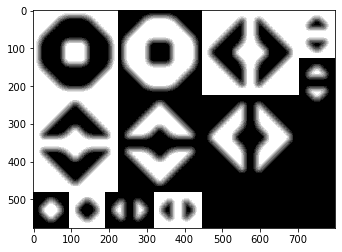

In [35]:
im = Image.open('landh-tiles/landh_tiles.png')
rgb_im = im.convert('RGBA')

print(rgb_im.size)
print(rgb_im.height / rgb_im.width)

plt.imshow(im)
plt.show()

In [36]:
def convert_coords(x, y, hpos, vpos):
	hoff = src_base_w * hpos
	voff = src_base_h * vpos
	x = max(0, min(iso_base_w - 1, x))
	y = max(0, min(iso_base_h - 1, y))
	u = (2 * x - iso_base_w) / iso_base_w
	v = (2 * y - iso_base_h) / iso_base_h
	r = max(-1, min(1, u - v))
	s = max(-1, min(1, u + v))
	sx = max(0, min(src_base_w - 1, (r + 1) * src_base_w / 2))
	sy = max(0, min(src_base_h - 1, (s + 1) * src_base_h / 2)) + voff
	rv, gv, bv, av = rgb_im_v.getpixel((sx, sy))
	v = int(iso_base_h * (rv + gv + bv) / (3 * 255) / 2)
	return sx, sy, v

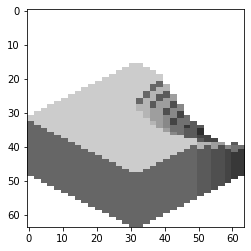

In [37]:
hpos = 11
vpos = 11

def convert_tile(hpos, vpos):
	img = Image.new( 'RGBA', (iso_base_w, iso_base_h * 2), (0, 0, 0, 0))
	pixels = img.load()
	for y in range(img.size[1]):
		for x in range(img.size[0]):
			if abs((iso_base_w - 1) / 2 - x) < (iso_base_h + 1) - abs(iso_base_h - 1 -2*y):
				sx, sy, v = convert_coords(x, y, hpos, vpos)
				r, g, b, a = rgb_im.getpixel((sx, sy))
				r, g, b = int(r * .8), int(g * .8), int(b * .8)
				for i in range(0, v):
					pixels[x, iso_base_h + y - i] = (int(r/2), int(g/2), int(b/2), 255)
				pixels[x, iso_base_h + y - v] = (r, g, b, 255)

plt.imshow(img)
plt.show()